# Chapter 11 - Understanding Quantum Algorithms
This Jupyter notebook has been updated to work with Python 3.12 and the following Qiskit versions:
* Qiskit v1.3, Qiskit runtime version: 0.34
* Qiskit v 2.0, Qiskit runtime version: 0.37
|||
|-|-|
|**Author:** |Robert Loredo|
|**Reviewer:** |Alain Chancé|
|**Date:** |April 12, 2025|
|**Version:** |**1.00**<br/>*Details see at the end of this notebook*|
|**References:**|
[Robert Loredo, Learn Quantum Computing with Python and IBM Quantum: Write your own practical quantum programs with Python, Second Edition, Packt, Feb 25, 2025](https://www.packtpub.com/en-us/product/learn-quantum-computing-with-python-and-ibm-quantum-9781803240923)
[Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/Chapter 11 - Quantum Algorithms-FinalV2.ipynb](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/blob/main/Chapter%2011%20-%20Quantum%20Algorithms-FinalV2.ipynb)
[Packt's code repository for the book](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition)
[LICENSE](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/blob/main/LICENSE)
[Migrate to the Qiskit Runtime V2 primitives](https://docs.quantum.ibm.com/migration-guides/v2-primitives)
<br/>

In [1]:
%run helper_file_1.0.ipynb

Token read from file:  Token.txt
Qiskit version: 2.0.0
Qiskit runtime version: 0.37.0
/home/alain/miniconda3/bin/python
Python 3.12.9


# Implementing Deutsch’s algorithm

Step 1: Prepare the input qubits, where q0=0, q1=1


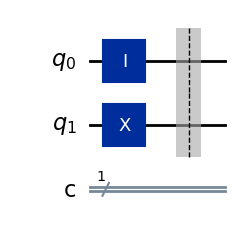

In [2]:
# Implement Deutsch's algorithm for a balanced function
qc = QuantumCircuit(2,1)

# Prepare the input qubits, where q0=0, q1=1
print('Step 1: Prepare the input qubits, where q0=0, q1=1')
qc.id(0)
qc.x(1)
qc.barrier()
qc.draw(output='mpl')


Figure 11.3: Initializing the qubits to 0 and 1

Step 2: Place each qubit in superposition by applying a Hadamard


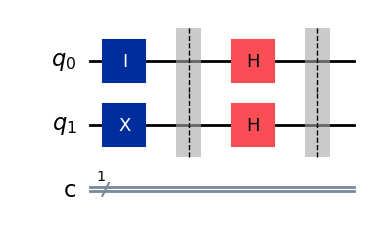

In [3]:
# Place each qubit in superposition by applying a Hadamard
print('Step 2: Place each qubit in superposition by applying a Hadamard')
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw(output='mpl')


Figure 11.4: Applying Hadamard to both qubits

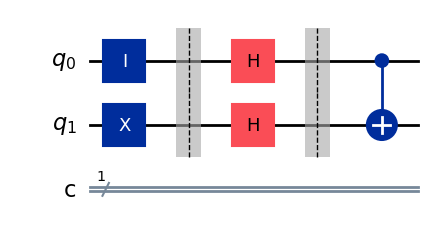

In [4]:
# Add a CNOT gate with the Control on q0 and Target on q1
qc.cx(0,1)
# Draw the circuit
qc.draw(output='mpl')


Figure 11.5: Defining the function type (balanced)

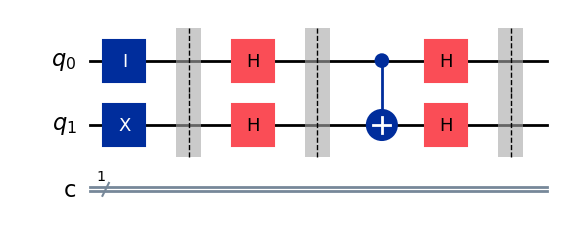

In [5]:
# Add the Hadamard gates to all qubits
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw(output='mpl')

Figure 11.6: Applying the Hadamard gate to the qubits before measuring

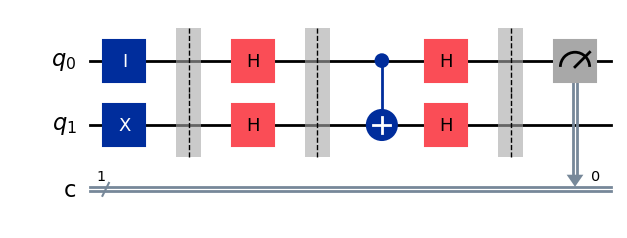

In [6]:
# Add measurement operator to the first qubit
qc.measure(0,0)
qc.draw(output='mpl')

Figure 11.7: Applying the measurement operator to just the first qubit

In [7]:
# Let's define two functions to run our circuits on both a Sampler or a quantum computer

# Run on an Sampler
def run_on_sampler(circuit):
    from qiskit.primitives import StatevectorSampler
    # Construct a Statetvector Sampler
    sampler = StatevectorSampler()

    # Run using sampler
    result = sampler.run([circuit]).result()
    return result
    

Step 6: Execute the circuit to view results.
{'1': 1024}


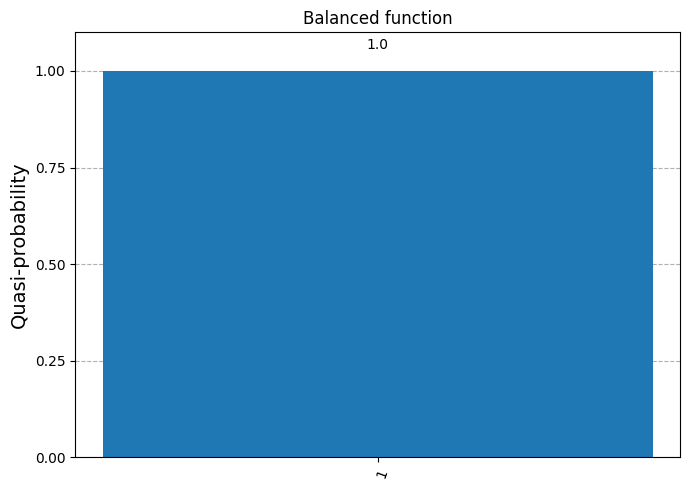

In [8]:
# Execute the quantum circuit on the simulator first to confirm our results.
print('Step 6: Execute the circuit to view results.')
result = run_on_sampler(qc)

# Get counts for the classical register "meas"
counts = result[0].data.c.get_counts()
print(counts)

plot_distribution(counts, title='Balanced function')

Figure 11.8: Result of value 1, indicating a balanced function

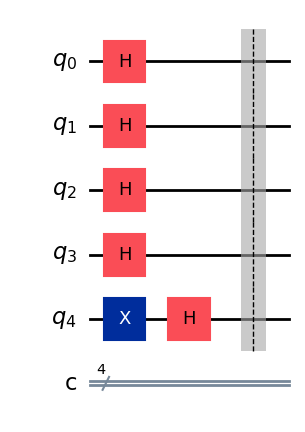

In [9]:
# Create the quantum circuit with both input registers X, and y
input_qubits = 4  # Refers to our X input register, 4-qubits
ancilla_qubit = 1 # Refers to our y input register, 1-qubit

# Total qubits in our quantum circuit
total_qubits = input_qubits + ancilla_qubit

# Generate the circuit
qc = QuantumCircuit(total_qubits, input_qubits)
# Set the X qubits in superposition
for idx in range(input_qubits):
    qc.h(idx)
    
# Set the y qubit to 1, then apply a Hadamard
qc.x(input_qubits)
qc.h(input_qubits)

qc.barrier()
qc.draw(output='mpl')


Figure 11.10: Preparing the input values of our quantum circuit

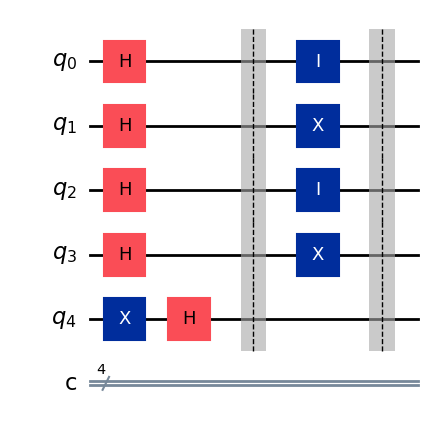

In [10]:
# Set the bit string which we wish to evaluate, in this case lets set '1010', where I indicates value 0, and x indicates value 1.
qc.id(0)
qc.x(1)
qc.id(2)
qc.x(3)

qc.barrier()
qc.draw(output='mpl')


Figure 11.11: State representation $|1010\rangle$ of the bit string $1010$

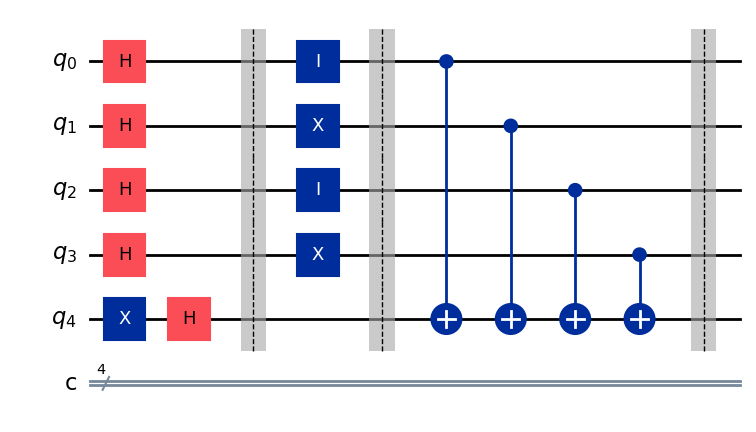

In [11]:
# Set oracle to either constant (output = 0s) 
# or balanced (output = 1s)

# In this example we will choose a balanced function 
for idx in range(input_qubits):
    qc.cx(idx, input_qubits)

qc.barrier()
qc.draw(output='mpl')


Figure 11.12: Representation of the added balanced oracle

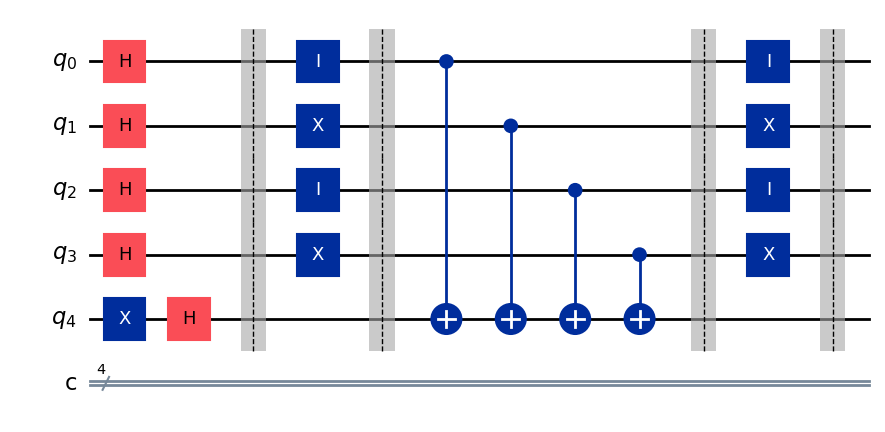

In [12]:
# Set the closing bit string we selected earlier to evaluate
qc.id(0)
qc.x(1)
qc.id(2)
qc.x(3)

qc.barrier()
qc.draw(output='mpl')


Figure 11.13: Oracle bounded by the bit string representation

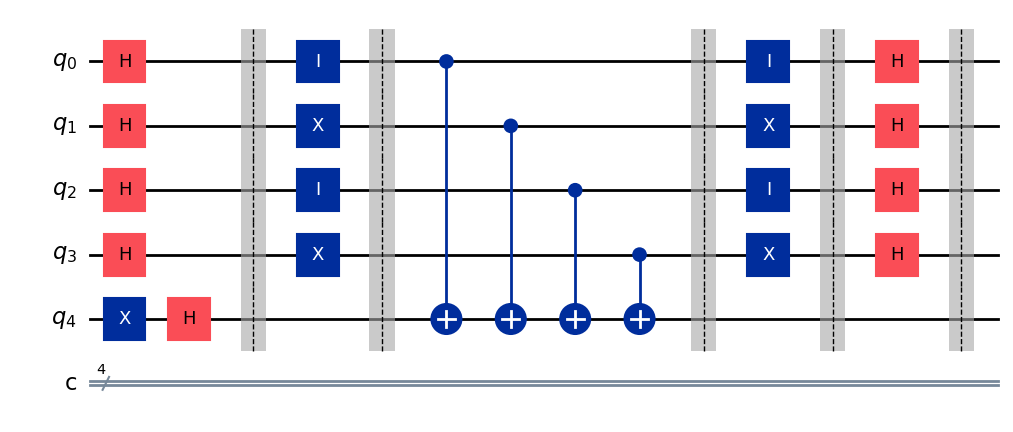

In [13]:
# Add the Hadamard gates to complete wrapping the oracle
for idx in range(4):
    qc.h(idx)

qc.barrier()
qc.draw(output='mpl')


Figure 11.14: A completed quantum circuit of the Deutsch-Jozsa algorithm for a balanced function

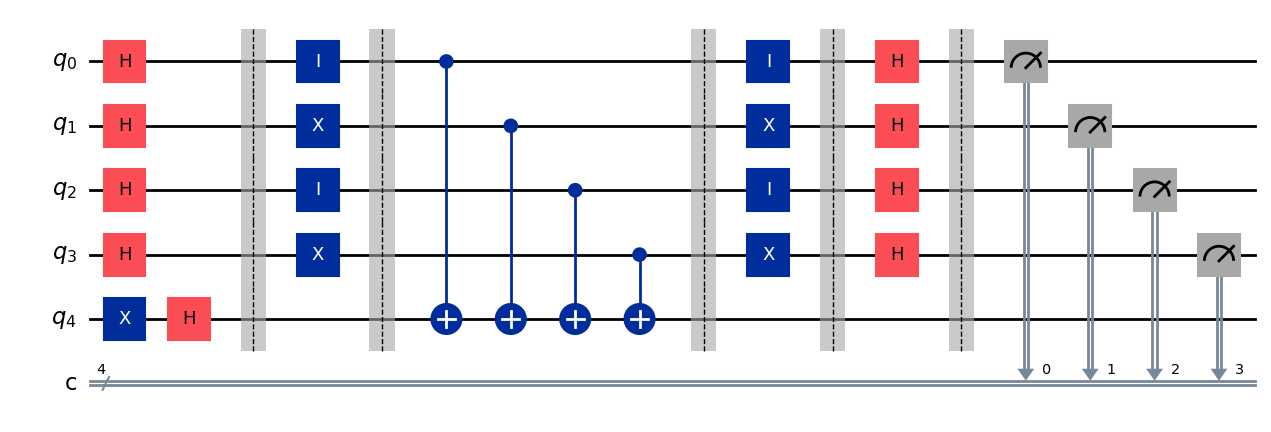

In [14]:
# Add measurements only to our inputs
qc.measure(range(4),range(4))

# Draw the circuit
qc.draw(output='mpl')


Figure 11.15: Final circuit for the Deutsch-Jozsa algorithm

{'1111': 1024}


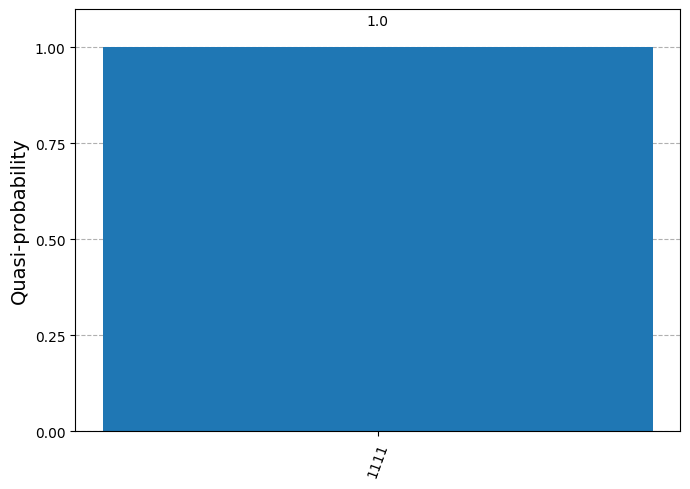

In [15]:
# Execute the circuit and print results and quasi-probabilities
result = run_on_sampler(qc)

# Get counts for the classical register "c"
counts = result[0].data.c.get_counts()

print(counts)
plot_distribution(counts)

Figure 11.16: Results from the simulator of a balanced function

In [16]:
# Create your secret number
shh = '1010'

# Set the number of qubits to represent secret number and an ancilla qubit
input_qubits = len(shh)
ancilla_qubit = 1
total_qubits = input_qubits + ancilla_qubit

# Create the quantum circuit
qc = QuantumCircuit(total_qubits, input_qubits)


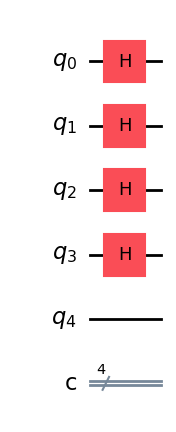

In [17]:
# Add Hadamard gates to the input qubits
for idx in range(input_qubits):
    qc.h(idx)

# Draw the input circuit
qc.draw(output='mpl')


Figure 11.17: Initializing the input qubits’ state from $|0\rangle$ to a superposition state, $|+\rangle$

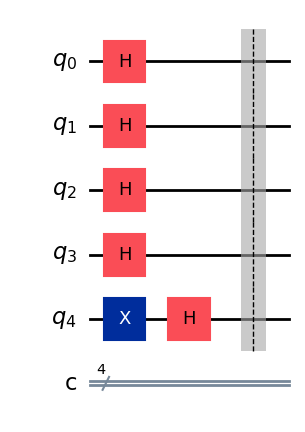

In [18]:
# Prepare the ancilla qubit of the circuit
qc.x(total_qubits-1)
qc.h(total_qubits-1)

qc.barrier()
  
# Draw the prepared circuit
qc.draw(output='mpl')


Figure 11.18: Initialization of all qubits

In [19]:
# Before creating the oracle, we need to adjust the qubits 
# Since they are ordered from left to right, we will reverse the secret number

# Current secret value
print('Secret before reverse: ', shh)

# Reverse order
shh = shh[::-1]
print('Secret after reverse: ', shh)


Secret before reverse:  1010
Secret after reverse:  0101


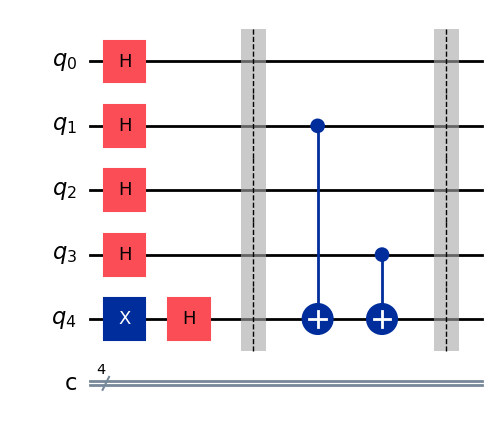

In [20]:
# Now that we have the right order, let's create the oracle
# by applying a CNOT, where the qubits set to '1' are the source
# and the targe would be the ancilla qubit
for idx in range(input_qubits):
    if shh[idx] == '1':
        qc.cx(idx, input_qubits)

qc.barrier()
qc.draw(output='mpl')


Figure 11.19: Oracle applying $CNOT$ where the secret string is set to ‘1’

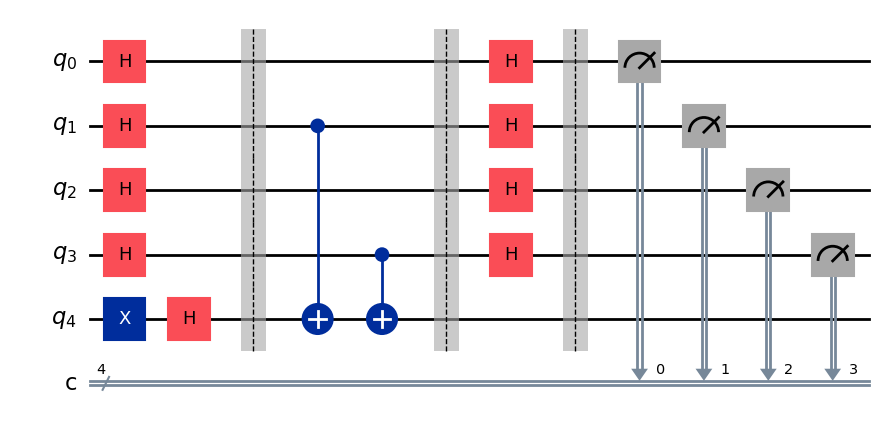

In [21]:
# Now let's close up our circuit with Hadamards applied to the input qubits
for idx in range(input_qubits):
    qc.h(idx)

qc.barrier()

# Finally, let's add measurements to our input qubits
qc.measure(range(input_qubits), range(input_qubits))

qc.draw(output='mpl')


Figure 11.20: Final circuit that implements the Bernstein-Vazirani algorithm

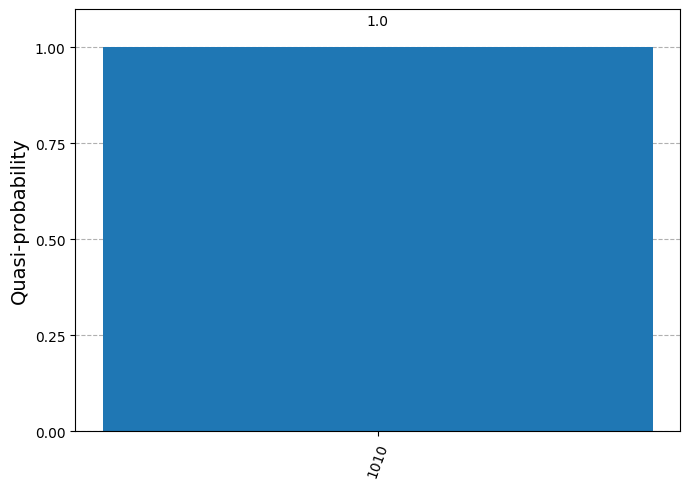

In [22]:
# Execute the circuit and plot the results
result = run_on_sampler(qc)

# Get counts for the classical register "c"
counts = result[0].data.c.get_counts()

plot_distribution(counts)

Figure 11.21: Result identifies with 100% probability the value of our secret string

## Print Qiskit version

In [23]:
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.0.0


## Print Qiskit runtime version

In [24]:
import qiskit_ibm_runtime
print(f"Qiskit runtime version: {qiskit_ibm_runtime.__version__}")

Qiskit runtime version: 0.37.0


## Show Python version

In [25]:
%%bash
which python
python --version

/home/alain/miniconda3/bin/python
Python 3.12.9
